In [ ]:
for i in range(200,1000,100):
    for p in range(1,7):
        preprocessor1 = make_pipeline(PolynomialFeatures(p, include_bias=False))
        print(i,p)

        best_model = Pipeline([

            ('preprocessor', transformers_encoders(site_energy_use, target, 0, 1)),
            ('testing', preprocessor1),
            (model.__class__.__name__, TransformedTargetRegressor(
                regressor=model,
                transformer=QuantileTransformer(n_quantiles=i, output_distribution="normal")))])
        best_model.fit(X_train, y_train)
        evaluation(best_model, X_train, y_train, X_test, y_test)

In [ ]:
best_models = [
    # [GradientBoostingRegressor(random_state=random_state), {'regressor__learning_rate': [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    #                                                         'regressor__subsample'    :   np.arange(0.1, 1.0, 0.1),
    #                                                         'regressor__max_features'    : [1.0, 'sqrt', 'log2'],
    #                                                         'regressor__max_depth'    : np.arange(1, 10),
    #                                                         "regressor__max_leaf_nodes": [2, 10, 20],
    #                                                         }],
    [XGBRegressor(random_state=random_state),
     {
         'regressor__n_estimators': [400, 700, 1000],
         'regressor__colsample_bytree': [0.7, 0.8],
         'regressor__max_depth': [15,20,25],
         'regressor__reg_alpha': [1.1, 1.2, 1.3],
         'regressor__reg_lambda': [1.1, 1.2, 1.3],
         'regressor__subsample': [0.7, 0.8, 0.9]
     }
     # {"regressor__learning_rate": (0.05, 0.10, 0.15),
     #                                           "regressor__max_depth": [ 3, 4, 5, 6, 8],
     #                                           "regressor__min_child_weight": [ 1, 3, 5, 7],
     #                                           "regressor__gamma":[ 0.0, 0.1, 0.2],
     #                                           "regressor__colsample_bytree":[ 0.3, 0.4],
     #                                           }
     # dict(
     # regressor__learning_rate=[0.1, 0.5, 1.0],
     # regressor__objective=['reg:squarederror'],
     # regressor__max_depth=np.arange(2, 10, 2),
     # regressor__n_estimators=[200, 300, 400],
     # regressor__subsample=[0.7, 0.8, 0.9, 1.0],
     # regressor__gamma=[ 0.1, 0.2, 0.05, 0.04,],
     # regressor__reg_lambda=[0.1, 0.5, 0.9]
     # )
     ],
    # Je garde pour référence cet estimateur

    # [RandomForestRegressor(random_state=random_state), {
    #     'regressor__max_features' : [1.0, 'sqrt', 'log2'],
    #     "regressor__criterion": ["squared_error", "absolute_error"],
    #     'regressor__max_depth': np.arange(20,35,5),
    #     'regressor__bootstrap' : [True, False],
    #     'regressor__n_estimators': np.arange(15,50, 5),
    #     # 'regressor__min_samples_leaf': np.arange(1,6)
    # }],
]
# for model in best_models:
#     for i in range(2):
#         for t in range(2):
#             best_model = global_gridsearch(model, site_energy_use, cat=i, num=t)
#             model_scores(best_model, model[0].__class__.__name__, X_test, y_test, f'xbr_rs_{random_state}_{i}_{t}')
#             plot_search_results(best_model.named_steps[model[0].__class__.__name__], model[0].__class__.__name__)
#             evaluation(best_model, X_train, y_train, X_test, y_test)

In [ ]:
# dist_param = {
#    # 'regressor__learning_rate': [0.1, 0.11, 0.3, 0.111],
#    'regressor__learning_rate': [0.1],
# # 'regressor__subsample'    :   np.arange(0.1, 0.9, 0.1),
# 'regressor__subsample'    :   [0.8],
# 'regressor__n_estimators' : [50,100,200, 500, 1000, 1500, 2000],
# 'regressor__max_depth'    : [9],
# # 'regressor__alpha'    : [0.1, 0.99, 0.5],
# 'regressor__max_features'    : ['sqrt'],
# # 'regressor__max_features'    :  np.arange(2,10),
# 'regressor__min_samples_split'    :  np.arange(2,20),
# 'regressor__min_samples_leaf'    :  [ 1, 2, 3, 5, 7, 10],
# # 'regressor__min_weight_fraction_leaf'    :  np.arange(0.1, 0.6, 0.1),
# # "regressor__criterion": ["squared_error", "friedman_mse"],
# # "regressor__loss": ["squared_error", 'huber'],
# "regressor__tol": [1e-3, 1e-4, 1e-5],
# "regressor__n_iter_no_change": [ 1, 2, 3],
# "regressor__max_leaf_nodes": [20],
# # "regressor__loss": ["squared_error", "absolute_error", 'huber', 'quantile'],
# }
dist_param = {
    'regressor__n_estimators': np.arange(100, 1500, 100),
    'regressor__max_depth': [4],
    'regressor__reg_alpha': np.arange(0.0, 1.9, 0.1),
    'regressor__reg_lambda':  np.arange(0.0, 1.9, 0.1),
    'regressor__subsample': np.arange(0.0, 1.0, 0.1),
    "regressor__learning_rate":[0.1],
    "regressor__min_child_weight": [1],
    "regressor__gamma":[0.0],
    "regressor__colsample_bytree":[0.4],
}

# dist_param = {
#     'regressor__n_estimators': np.arange(100, 1500, 100),
#     'regressor__max_depth': np.arange(4,50,2),
#     'regressor__reg_alpha': np.arange(0.0, 1.9, 0.1),
#     'regressor__reg_lambda':  np.arange(0.0, 1.9, 0.1),
#     'regressor__subsample': np.arange(0.0, 1.0, 0.1),
#     "regressor__learning_rate": (0.05, 0.10),
#     "regressor__min_child_weight":np.arange(2, 15),
#     "regressor__gamma":np.arange(0.0, 0.3, 0.1),
#     "regressor__colsample_bytree":np.arange(0.1, 1.0, 0.1),
# }
# import optuna
# dist_param = {
# 'regressor__learning_rate': optuna.distributions.FloatDistribution(0.2, 0.1, 0.11, 0.3, 0.111),
# 'regressor__subsample'    :   np.arange(0.1, 0.9, 0.1),
# 'regressor__n_estimators' : optuna.distributions.IntDistribution(200, 500, 1000, 1500, 2000),
# 'regressor__max_depth'    : np.arange(2, 50, 1),
# 'regressor__alpha'    : [0.1, 1.0, 0.5],
# 'regressor__max_features'    : [1.0, 'sqrt', 'log2'],
# # 'regressor__max_features'    :  np.arange(2,10),
# 'regressor__min_samples_split'    :  np.arange(2,20),
# 'regressor__min_samples_leaf'    :  [ 1, 2, 3, 5, 7, 10],
# 'regressor__min_weight_fraction_leaf'    :  np.arange(0.1, 0.6, 0.1),
# "regressor__criterion": ["squared_error", "friedman_mse"],
# "regressor__loss": ["squared_error", 'huber'],
# "regressor__tol": [1e-3, 1e-4, 1e-5],
# "regressor__n_iter_no_change": [ 1, 2, 3],
# "regressor__max_leaf_nodes": [2, 10, 20],
#     "regressor__loss": ["squared_error", "absolute_error", 'huber', 'quantile'],
# }


# {'regressor__subsample': 0.6, 'regressor__n_estimators': 600, 'regressor__min_weight_fraction_leaf': 0.0, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 6, 'regressor__max_depth': 5, 'regressor__loss': 'quantile', 'regressor__learning_rate': 0.1, 'regressor__criterion': 'squared_error', 'regressor__alpha': 0.6}

In [ ]:
plot_learning_curve(model, site_energy_use, X_train, y_train, 'neg_mean_absolute_error')

train_scores, test_scores = validation_curve(
    estimator=RandomForestRegressor(),
    X=X,
    y=y,
    param_name='max_depth',
    param_range=np.arange(4,11),
    scoring='r2',
    n_jobs=-1,
    cv=15
)
print(train_scores)


def plot_validation_curve1(param_range, train_scores, test_scores, title, alpha=0.1):
    param_range = [x[1] for x in param_range]
    sort_idx = np.argsort(param_range)
    param_range=np.array(param_range)[sort_idx]
    train_mean = np.mean(train_scores, axis=1)[sort_idx]
    train_std = np.std(train_scores, axis=1)[sort_idx]
    test_mean = np.mean(test_scores, axis=1)[sort_idx]
    test_std = np.std(test_scores, axis=1)[sort_idx]
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Weight of class 2')
    plt.ylabel('Average values and standard deviation for F1-Score')
    plt.legend(loc='best')
    plt.show()

plot_validation_curve(GradientBoostingRegressor(), X, y, 'alpha', [1.0,0.07], 'r2')

In [ ]:
# dist_param = {
#    # 'regressor__learning_rate': [0.1, 0.11, 0.3, 0.111],
#    'regressor__learning_rate': [0.1],
# # 'regressor__subsample'    :   np.arange(0.1, 0.9, 0.1),
# 'regressor__subsample'    :   [0.8],
# 'regressor__n_estimators' : [50,100,200, 500, 1000, 1500, 2000],
# 'regressor__max_depth'    : [9],
# # 'regressor__alpha'    : [0.1, 0.99, 0.5],
# 'regressor__max_features'    : ['sqrt'],
# # 'regressor__max_features'    :  np.arange(2,10),
# 'regressor__min_samples_split'    :  np.arange(2,20),
# 'regressor__min_samples_leaf'    :  [ 1, 2, 3, 5, 7, 10],
# # 'regressor__min_weight_fraction_leaf'    :  np.arange(0.1, 0.6, 0.1),
# # "regressor__criterion": ["squared_error", "friedman_mse"],
# # "regressor__loss": ["squared_error", 'huber'],
# "regressor__tol": [1e-3, 1e-4, 1e-5],
# "regressor__n_iter_no_change": [ 1, 2, 3],
# "regressor__max_leaf_nodes": [20],
# # "regressor__loss": ["squared_error", "absolute_error", 'huber', 'quantile'],
# }
dist_param = {
    'regressor__n_estimators': np.arange(100, 1500, 100),
    'regressor__max_depth': [4],
    'regressor__reg_alpha': np.arange(0.0, 1.9, 0.1),
    'regressor__reg_lambda':  np.arange(0.0, 1.9, 0.1),
    'regressor__subsample': np.arange(0.0, 1.0, 0.1),
    "regressor__learning_rate":[0.1],
    "regressor__min_child_weight": [1],
    "regressor__gamma":[0.0],
    "regressor__colsample_bytree":[0.4],
}

# dist_param = {
#     'regressor__n_estimators': np.arange(100, 1500, 100),
#     'regressor__max_depth': np.arange(4,50,2),
#     'regressor__reg_alpha': np.arange(0.0, 1.9, 0.1),
#     'regressor__reg_lambda':  np.arange(0.0, 1.9, 0.1),
#     'regressor__subsample': np.arange(0.0, 1.0, 0.1),
#     "regressor__learning_rate": (0.05, 0.10),
#     "regressor__min_child_weight":np.arange(2, 15),
#     "regressor__gamma":np.arange(0.0, 0.3, 0.1),
#     "regressor__colsample_bytree":np.arange(0.1, 1.0, 0.1),
# }
# import optuna
# dist_param = {
# 'regressor__learning_rate': optuna.distributions.FloatDistribution(0.2, 0.1, 0.11, 0.3, 0.111),
# 'regressor__subsample'    :   np.arange(0.1, 0.9, 0.1),
# 'regressor__n_estimators' : optuna.distributions.IntDistribution(200, 500, 1000, 1500, 2000),
# 'regressor__max_depth'    : np.arange(2, 50, 1),
# 'regressor__alpha'    : [0.1, 1.0, 0.5],
# 'regressor__max_features'    : [1.0, 'sqrt', 'log2'],
# # 'regressor__max_features'    :  np.arange(2,10),
# 'regressor__min_samples_split'    :  np.arange(2,20),
# 'regressor__min_samples_leaf'    :  [ 1, 2, 3, 5, 7, 10],
# 'regressor__min_weight_fraction_leaf'    :  np.arange(0.1, 0.6, 0.1),
# "regressor__criterion": ["squared_error", "friedman_mse"],
# "regressor__loss": ["squared_error", 'huber'],
# "regressor__tol": [1e-3, 1e-4, 1e-5],
# "regressor__n_iter_no_change": [ 1, 2, 3],
# "regressor__max_leaf_nodes": [2, 10, 20],
#     "regressor__loss": ["squared_error", "absolute_error", 'huber', 'quantile'],
# }


# {'regressor__subsample': 0.6, 'regressor__n_estimators': 600, 'regressor__min_weight_fraction_leaf': 0.0, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 6, 'regressor__max_depth': 5, 'regressor__loss': 'quantile', 'regressor__learning_rate': 0.1, 'regressor__criterion': 'squared_error', 'regressor__alpha': 0.6}

In [ ]:
plot_learning_curve(model, site_energy_use, X_train, y_train, 'neg_mean_absolute_error')

train_scores, test_scores = validation_curve(
    estimator=RandomForestRegressor(),
    X=X,
    y=y,
    param_name='max_depth',
    param_range=np.arange(4,11),
    scoring='r2',
    n_jobs=-1,
    cv=15
)
print(train_scores)


def plot_validation_curve1(param_range, train_scores, test_scores, title, alpha=0.1):
    param_range = [x[1] for x in param_range]
    sort_idx = np.argsort(param_range)
    param_range=np.array(param_range)[sort_idx]
    train_mean = np.mean(train_scores, axis=1)[sort_idx]
    train_std = np.std(train_scores, axis=1)[sort_idx]
    test_mean = np.mean(test_scores, axis=1)[sort_idx]
    test_std = np.std(test_scores, axis=1)[sort_idx]
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Weight of class 2')
    plt.ylabel('Average values and standard deviation for F1-Score')
    plt.legend(loc='best')
    plt.show()

plot_validation_curve(GradientBoostingRegressor(), X, y, 'alpha', [1.0,0.07], 'r2')

In [ ]:
def plot_validation_curve(model, X, y, param_name, param_range, scoring):
    train_scores, test_scores = validation_curve(
        model,
        X,
        y,
        param_name=param_name,
        param_range=param_range,
        scoring=scoring,
        n_jobs=2,
        cv=5
    )
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # plt.subplots(1, figsize=(10,7))
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")

    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="gray")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="gainsboro")

    plt.title("Validation Curve With Random Forest")
    plt.xlabel(param_name)
    plt.ylabel(f"{scoring} Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()
    # plt.title(f"Validation Curve with {model}")
    # plt.xlabel(param_name)
    # plt.ylabel("Score")
    # plt.ylim(0.0, 1.1)
    # lw = 2
    # plt.semilogx(
    #     param_range, train_scores_mean, label="Training score", color="darkorange"#, lw=lw
    # )
    # plt.fill_between(
    #     param_range,
    #     train_scores_mean - train_scores_std,
    #     train_scores_mean + train_scores_std,
    #     alpha=0.2,
    #     color="darkorange",
    #     lw=lw,
    # )
    # plt.semilogx(
    #     param_range, test_scores_mean, label="Cross-validation score", color="navy"#, lw=lw
    # )
    # plt.fill_between(
    #     param_range,
    #     test_scores_mean - test_scores_std,
    #     test_scores_mean + test_scores_std,
    #     alpha=0.2,
    #     color="navy",
    #     lw=lw,
    # )
    # plt.legend(loc="best")
    # plt.show()

In [ ]:
plot_learning_curve(model, site_energy_use, X_train, y_train, 'neg_mean_absolute_error')

train_scores, test_scores = validation_curve(
    estimator=RandomForestRegressor(),
    X=X,
    y=y,
    param_name='max_depth',
    param_range=np.arange(4,11),
    scoring='r2',
    n_jobs=-1,
    cv=15
)
print(train_scores)


def plot_validation_curve1(param_range, train_scores, test_scores, title, alpha=0.1):
    param_range = [x[1] for x in param_range]
    sort_idx = np.argsort(param_range)
    param_range=np.array(param_range)[sort_idx]
    train_mean = np.mean(train_scores, axis=1)[sort_idx]
    train_std = np.std(train_scores, axis=1)[sort_idx]
    test_mean = np.mean(test_scores, axis=1)[sort_idx]
    test_std = np.std(test_scores, axis=1)[sort_idx]
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Weight of class 2')
    plt.ylabel('Average values and standard deviation for F1-Score')
    plt.legend(loc='best')
    plt.show()

plot_validation_curve(GradientBoostingRegressor(), X, y, 'alpha', [1.0,0.07], 'r2')

In [ ]:
def plot_validation_curve(model, X, y, param_name, param_range, scoring):
    train_scores, test_scores = validation_curve(
        model,
        X,
        y,
        param_name=param_name,
        param_range=param_range,
        scoring=scoring,
        n_jobs=2,
        cv=5
    )
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # plt.subplots(1, figsize=(10,7))
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")

    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="gray")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="gainsboro")

    plt.title("Validation Curve With Random Forest")
    plt.xlabel(param_name)
    plt.ylabel(f"{scoring} Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()
    # plt.title(f"Validation Curve with {model}")
    # plt.xlabel(param_name)
    # plt.ylabel("Score")
    # plt.ylim(0.0, 1.1)
    # lw = 2
    # plt.semilogx(
    #     param_range, train_scores_mean, label="Training score", color="darkorange"#, lw=lw
    # )
    # plt.fill_between(
    #     param_range,
    #     train_scores_mean - train_scores_std,
    #     train_scores_mean + train_scores_std,
    #     alpha=0.2,
    #     color="darkorange",
    #     lw=lw,
    # )
    # plt.semilogx(
    #     param_range, test_scores_mean, label="Cross-validation score", color="navy"#, lw=lw
    # )
    # plt.fill_between(
    #     param_range,
    #     test_scores_mean - test_scores_std,
    #     test_scores_mean + test_scores_std,
    #     alpha=0.2,
    #     color="navy",
    #     lw=lw,
    # )
    # plt.legend(loc="best")
    # plt.show()

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
otp_model = HistGradientBoostingRegressor(random_state=random_state)

dist_param = {'regressor__learning_rate': np.arange(0.1, 0.6, 0.1),
              'regressor__max_leaf_nodes'    :   np.arange(25, 40, 1),
              'regressor__max_iter'    : np.arange(80,200, 10),
              "regressor__loss": ["squared_error", "absolute_error", "poisson"],

              }

In [ ]:
d = []
for model in models:
    for i in range(2):
        for t in range(2):
            row = off_tune_model(model[0], 'neg_mean_absolute_error', site_energy_use, i, t)
            d.append(row)
            # best_model = global_gridsearch(model, site_energy_use, cat=i, num=t)
            # model_scores(best_model, model[0].__class__.__name__, X_test, y_test, f'_rs_{random_state}_{i}_{t}', path)
            # evaluation(best_model, X_train, y_train, X_test, y_test)
df_model = pd.DataFrame(d)
df_model.to_csv('no_tuning_energy.csv', index=False)
df_models = pd.read_csv('no_tuning_energy.csv')
f = df_models.groupby(['model', 'cat_transformer', 'num_transformer'])['MAE'].mean()


fig,  (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), sharey=True)

plt.suptitle("Comparaison des performances des modèles")

sns.barplot(data=f.reset_index(), x='MAE', y='model', hue='cat_transformer', ax=ax1)
sns.barplot(data=f.reset_index(), x='MAE', y='model', hue='num_transformer',ax=ax2, palette="pastel")
plt.show()

In [ ]:
# logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
# Y_log = logtransformer.transform(site_energy_use[[target]])
#
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
# sns.histplot(data=site_energy_use, x=target, stat="density", ax=axes[0])
# axes[0].set_title("Données initiales")
# sns.histplot(data=Y_log, x=target, stat="density", ax=axes[1])
# axes[1].set_title("Application du logarithme")
# plt.suptitle(f"Distribution de {target} avec changement d'échelle (transformation log simple)", fontsize=22)
# plt.show()

In [ ]:
# model = sm.OLS(y, X)
# results = model.fit()
# print(results.summary())

In [ ]:
d = pd.read_csv("./final/ener/ener_score_grid.csv")
d.loc[d['cat_transformer'].str.startswith('Target'), 'cat_transformer'] = 'TargetEncoder'
d.loc[d['cat_transformer'].str.startswith('One'), 'cat_transformer'] = 'OneHotEncoder'
# d[d['model'] == 'LinearRegression']
# d.drop(d[d['model'] == 'LinearRegression'].index, axis=0, inplace=True)
f = d.groupby(['model', 'cat_transformer', 'num_transformer'])['MAE', 'R2'].mean()
# .unstack(1).plot.bar()


# axes[0].set_title("R2 avec les encodeurs de catégorie")
# axes[1].set_title("R2 avec les encodeurs de catégorie")ax1


# axes[1].set_title("y_test vs y_pred")
plt.suptitle("plt.title('Comparaison des performances des modèles (jeu de test)')")


d.loc[d['cat_transformer'].str.startswith('Target'), 'cat_transformer'] = 'TargetEncoder'
d.loc[d['cat_transformer'].str.startswith('One'), 'cat_transformer'] = 'OneHotEncoder'
# d[d['model'] == 'LinearRegression']
# d.drop(d[d['model'] == 'LinearRegression'].index, axis=0, inplace=True)
f = d.groupby(['model', 'cat_transformer', 'num_transformer'])['MAE', 'R2'].mean()
# .unstack(1).plot.bar()

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10), sharey=True)

# axes[0].set_title("R2 avec les encodeurs de catégorie")
# axes[1].set_title("R2 avec les encodeurs de catégorie")ax1


# axes[1].set_title("y_test vs y_pred")
plt.suptitle("Comparaison des performances des modèles avec optimisation")


sns.barplot(data=f.reset_index(), x='R2', y='model', hue='cat_transformer', ax=ax1)
sns.barplot(data=f.reset_index(), x='R2', y='model', hue='num_transformer',ax=ax2, palette="pastel")
sns.barplot(data=f.reset_index(), x='MAE', y='model', hue='cat_transformer', ax=ax3)
sns.barplot(data=f.reset_index(), x='MAE', y='model', hue='num_transformer',ax=ax4, palette="pastel")
plt.show()

In [ ]:
df['Cluster'] = df['Cluster'].astype(str)
df['Cluster']

In [ ]:
# t = np.arange(5, 80, 5)
# for i in t:
#     print(i)
#     model1 = Pipeline([
#         ('preprocessor', transformers_encoders(site_energy_use, target, 0, 1)),
#         ('testing', PCA(random_state=random_state, n_components=i)),
#         (model.__class__.__name__, TransformedTargetRegressor(
#             regressor=model,
#             transformer=QuantileTransformer(n_quantiles=500, output_distribution="normal")))])
#     model1.fit(X_train, y_train)
#     evaluation(model1, X_train, y_train, X_test, y_test)

# best_model.named_steps[model.__class__.__name__].regressor_
# best_model.named_steps['testing']['gridsearchcv'].best_estimator_.explained_variance_ratio_
# explained_variance = pd.Series(100*best_model.named_steps['testing']['gridsearchcv'].best_estimator_.explained_variance_ratio_)
# # explained_variance.plot(kind='bar', rot='90', figsize=(15,10), ylabel='Explained variance')
# explained_variance

In [ ]:
d = []
for model in models:
    row = off_tune_model(model[0], 'neg_mean_absolute_error', site_energy_use)
    d.append(row)
    # best_model_param = global_gridsearch(model, site_energy_use, cat=1, num=1)
    # model_scores(best_model_param, model[0].__class__.__name__, 'final_feat_rs1_3')
    # evaluation(best_model_param, X_train, y_train, X_test, y_test)
df_models = pd.DataFrame(d)
df_models.to_csv('no_tuning_energy.csv', index=False)
plt.figure(figsize=(12, 8))
no = pd.read_csv('no_tuning_energy.csv')

sns.barplot(data=no, y='model', x='mae', palette="pastel")

plt.title("CrossValScore sans gridsearch")

plt.show()

In [203]:
import numpy as np
import pandas as pd
import sidetable as stb
import time

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot
from category_encoders.target_encoder import TargetEncoder

from sklearn.metrics import f1_score

from sklearn.model_selection import learning_curve, validation_curve, train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression, SGDRegressor, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler, OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

from xgboost import XGBRegressor

import shap


from sklearn import set_config
set_config(display='diagram')
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

# Utility functions

In [204]:
def model_metric(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
    #squared True returns MSE value, False returns RMSE value.
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
    rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
    r2 = r2_score(y_true=y_test,y_pred=y_pred)
    print("MAE:", round(mae, 2))
    print("R2:", r2)
    print("MSE:", mse)
    print("RMSE:", rmse)

    errors = abs(y_pred - y_test)
    # Mean Absolute Error (MAE)
    # print('MAE =', round(np.mean(errors), 2), 'unit')

    # mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Précision
    prec = 100 - np.mean(mape)
    print('Précision :', round(prec, 2), '%.')

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    print("score_train =",round(score_train,3),"| score_test =", round(score_test,3))

def evaluation(model, X_train, y_train, X_test, y_test, metric_name=False):
    if metric_name:
        import sklearn
        print(sklearn.metrics.get_scorer_names())
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_metric(model, X_train, y_train, X_test, y_test)
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    def visualize_actual_pred(y_test, y_pred):
        plt.figure(figsize=(16,8))
        test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
        test = test.reset_index()
        # test = test.drop(['index'],axis=1)
        plt.plot(test['Actual value'], c='green', label='Actual value')
        plt.plot(test['Predicted value'], c='red', label='Predicted value')
        # plt.scatter(test.index, test['Actual value'], alpha=0.5, s=10, c='blue')
        # plt.scatter(y_test, y_pred, alpha=0.5, s=10, c='blue')
        # plt.scatter(test.index, test['Predicted value'], alpha=0.5, s=10, c='red')
        plt.xlabel('index')
        plt.ylabel('y_pred / y_test')
        plt.title('y_test vs y_pred')
        plt.legend(['Actual value','Predicted value'])
        plt.show()
    # visualize_actual_pred(y_test, y_pred)
    print('*'*100)

def plot_learning_curve(model, df, X_train, y_train, scoring: str, cv : int=5, train_size : list=np.linspace(0.1, 1, 10)):
    model = Pipeline([
        ('preprocessor', transformers_encoders(df, 'SiteEnergyUseWN(kBtu)', 0, 0)),
        (model.__class__.__name__, model)])
    model.fit(X_train, y_train)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=cv, scoring=scoring,
                                               train_sizes=train_size
                                               )
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

def plot_validation_curve(model, param_name, param_range, scoring):
    train_scores, test_scores = validation_curve(
        model,
        X,
        y,
        param_name=param_name,
        param_range=param_range,
        scoring=scoring,
        n_jobs=2,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(f"Validation Curve with {model}")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    # plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(
        param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    plt.semilogx(
        param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.show()

def off_tune_model(model, scoring, df):
    start_time = time.time()
    # df_models = pd.DataFrame(columns=['model', 'run_time', 'mae', 'mae_cv'])
    # d = []
    # d.append(row)
    # df_models = pd.DataFrame(d)
    # df_models.to_csv('no_tuning.csv', index=False)
    pre = Pipeline([
    ('preprocessor', transformers_encoders(df, 'SiteEnergyUseWN(kBtu)', 0, 0)),
    (model.__class__.__name__, model)])

    estimator = pre.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    scores = cross_val_score(estimator,
                             X_train,
                             y_train,
                             scoring=scoring,
                             cv=10)

    row = {'model': model.__class__.__name__,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'mae': round(mean_absolute_error(y_test, y_pred)),
           'mae_cv': round(np.mean(-scores))
           }
    return row

def features_importance(model, model_name):
    """Shap values for the features"""
    shap_preprocess = transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)
    explainer = shap.Explainer(model.named_steps[model_name.__class__.__name__])
    preprocess_df = pd.DataFrame(shap_preprocess.fit_transform(X_train), columns=shap_preprocess.get_feature_names_out())
    shap_values = explainer(preprocess_df)
    shap.plots.bar(shap_values, max_display=20)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])
    shap.plots.beeswarm(shap_values, max_display=20)

import glob
def visualise_best_model(path):
    glued_data = pd.DataFrame()
    for file_name in glob.glob(path + '*.csv'):
        f = pd.read_csv(file_name, low_memory=False)
        glued_data = pd.concat([glued_data,f],axis=0)
    # glued_data.plot(kind='bar')
    # x = np.arange(len(glued_data.index))
    # width = 0.35
    #
    # fig, ax = plt.subplots(figsize=(20,8), sharey=False, sharex=False)
    #
    # scores1 = ax.bar(x - width/2, glued_data['MAE'], width, label='SiteEnergyUse(kBtu)')
    # # scores2 = ax.bar(x + width/2, glued_data['SEU_pred'], width, label='Prédictions')
    # ax.set_ylabel('(kBtu)')
    # ax.set_xticks(x)
    # ax.set_xticklabels(glued_data.model)
    # ax.legend()
    # ax.bar_label(scores1, padding=3)
    # # ax.bar_label(scores2, padding=3)
    #
    # plt.suptitle("Ecarts de prédictions sur la variable SiteEnergyUse(kBtu) par type de bâtiment", fontsize=22)
    # fig.tight_layout()
    #
    # plt.show()
    glued_data.to_csv('./final/energy_final.csv', index=False)
    return glued_data

def model_scores(pipeline, step, feature_selection):
    df_results = pd.DataFrame.from_dict(pipeline.named_steps[step].cv_results_).sort_values('rank_test_neg_mean_absolute_error')
    best_nmae = pipeline.named_steps[step].best_score_
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pipeline.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print(step)
    print(f"Meilleur score MAE : {round(best_nmae,3)}\nMeilleur Score R2 : {round(best_r2,3)}\nMeilleurs paramètres : {best_params}\nTemps moyen d'entrainement : {training_time}s", "-"*100, sep='\n')

    d = {'model': step, 'MAE': best_nmae, 'R2': best_r2, 'Best_params': [best_params], 'training_time': training_time,
         'cat_transformer': [pipeline.named_steps['preprocessor'].named_transformers_['cat']], 'num_transformer': [pipeline.named_steps['preprocessor'].named_transformers_['num']], 'feature_selection': feature_selection}
    model_selection_df = pd.DataFrame(d)
    model_selection_df.to_csv('./model_selection/testing3/'+step+'_'+feature_selection+'.csv', index=False)
    return df_results


from sklearn.preprocessing import FunctionTransformer

def transformers_encoders(df, target, cat_trans: int, num_trans : int, energy_star_score=False):
    categorical_features = df.select_dtypes(include=['object']).columns
    if energy_star_score:
        numeric_features = df.select_dtypes(exclude=['object']).columns
    else:
        numeric_features = df.drop(target, axis=1).select_dtypes(exclude=['object']).columns

    numeric_transformers = [StandardScaler(), RobustScaler()]
    categorical_transformers = [OneHotEncoder(handle_unknown="ignore", sparse=False), TargetEncoder(min_samples_leaf=20, smoothing=10)]

    preprocessor = ColumnTransformer(transformers=[
        ('cat',  categorical_transformers[cat_trans], categorical_features),
        ('num', numeric_transformers[num_trans], numeric_features),
        # ('target', FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True), target)
    ]#,remainder='passthrough'
    )
    return preprocessor

from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.compose import TransformedTargetRegressor
def global_gridsearch(model_params, df):
    logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
    grid_cv = Pipeline([
        ('preprocessor', transformers_encoders(df, 'SiteEnergyUseWN(kBtu)', 0, 0)),
        (model_params[0].__class__.__name__, GridSearchCV(
            model_params[0],
            # TransformedTargetRegressor(
            #     regressor=model_params[0],
            #     transformer=logtransformer,),
            param_grid=model_params[1],
            cv=5,
            scoring=('r2','neg_mean_absolute_error'),
            return_train_score = True,
            refit='neg_mean_absolute_error',
            n_jobs = -1))])

    # Y_log = logtransformer.transform(y_test)
    # model1.fit(X_train, logtransformer.transform(y_train))
    # # print(regr_trans)
    # y_pred = model1.predict(X_test).reshape(-1, 1)
    # grid_cv_model = grid_cv.fit(X_train, logtransformer.transform(y_train))
    grid_cv_model = grid_cv.fit(X_train, y_train)
    # print(grid_cv_model)
    return grid_cv_model


In [ ]:
from sklearn.decomposition import PCA
preprocessor = make_pipeline(SelectKBest(f_classif, k=13))
opt = make_pipeline(GridSearchCV(
    PCA(random_state=random_state),
    param_grid={'n_components': [2, 5, 7, 9, 12]},
    cv=5,
    scoring=('r2','neg_mean_absolute_error'),
    return_train_score = True,
    refit='neg_mean_absolute_error',
    n_jobs = -1))

In [205]:
# choix du random_state pour reproductibilité
random_state = 42

In [206]:
df =  pd.read_csv('non_residential_2016_Building_Energy_Benchmarking.csv')
df.set_index('OSEBuildingID', inplace=True)
df.shape

(1619, 47)

In [207]:
df.head()

DataYear    BuildingType PrimaryPropertyType  \
OSEBuildingID                                                 
1                  2016  NonResidential               Hotel   
2                  2016  NonResidential               Hotel   
3                  2016  NonResidential               Hotel   
5                  2016  NonResidential               Hotel   
8                  2016  NonResidential               Hotel   

                              PropertyName          Address     City State  \
OSEBuildingID                                                                
1                     Mayflower park hotel    405 Olive way  Seattle    WA   
2                          Paramount Hotel  724 Pine street  Seattle    WA   
3                  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA   
5                                HOTEL MAX   620 STEWART ST  Seattle    WA   
8              WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA   

               ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
OSEBuildingID                                                               
1              98101.0                    0659000030                    7   
2              98101.0                    0659000220                    7   
3              98101.0                    0659000475                    7   
5              98101.0                    0659000640                    7   
8              98121.0                    0659000970                    7   

              Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
OSEBuildingID                                                                   
1                 DOWNTOWN  47.61220 -122.33799       1927                1.0   
2                 DOWNTOWN  47.61317 -122.33393       1996                1.0   
3                 DOWNTOWN  47.61393 -122.33810       1969                1.0   
5                 DOWNTOWN  47.61412 -122.33664       1926                1.0   
8                 DOWNTOWN  47.61375 -122.34047       1980                1.0   

               NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
OSEBuildingID                                                         
1                          12             88434                   0   
2                          11            103566               15064   
3                          41            956110              196718   
5                          10             61320                   0   
8                          18            175580               62000   

               PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
OSEBuildingID                                                          
1                               88434                          Hotel   
2                               88502     Hotel, Parking, Restaurant   
3                              759392                          Hotel   
5                               61320                          Hotel   
8                              113580  Hotel, Parking, Swimming Pool   

              LargestPropertyUseType  LargestPropertyUseTypeGFA  \
OSEBuildingID                                                     
1                              Hotel                    88434.0   
2                              Hotel                    83880.0   
3                              Hotel                   756493.0   
5                              Hotel                    61320.0   
8                              Hotel                   123445.0   

              SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                                                 
1                                      NaN                              NaN   
2                                  Parking                          15064.0   
3                                      NaN                              NaN   
5                                      NaN        

In [208]:
df.stb.missing()

missing  total    percent
Outlier                             1603   1619  99.011736
YearsENERGYSTARCertified            1522   1619  94.008647
ThirdLargestPropertyUseTypeGFA      1279   1619  78.999382
ThirdLargestPropertyUseType         1279   1619  78.999382
SecondLargestPropertyUseType         787   1619  48.610253
SecondLargestPropertyUseTypeGFA      787   1619  48.610253
ENERGYSTARScore                      549   1619  33.909821
ZipCode                               16   1619   0.988264
LargestPropertyUseTypeGFA              4   1619   0.247066
SiteEUIWN(kBtu/sf)                     1   1619   0.061767
SiteEnergyUseWN(kBtu)                  1   1619   0.061767
TotalGHGEmissions                      0   1619   0.000000
SourceEUIWN(kBtu/sf)                   0   1619   0.000000
YearBuilt_bins                         0   1619   0.000000
Building_age                           0   1619   0.000000
SiteEUI(kBtu/sf)                       0   1619   0.000000
SourceEUI(kBtu/sf)                     0   1619   0.000000
SiteEnergyUse(kBtu)                    0   1619   0.000000
SteamUse(kBtu)                         0   1619   0.000000
GHGEmissionsIntensity                  0   1619   0.000000
Electricity(kBtu)                      0   1619   0.000000
NaturalGas(therms)                     0   1619   0.000000
NaturalGas(kBtu)                       0   1619   0.000000
DefaultData                            0   1619   0.000000
ComplianceStatus                       0   1619   0.000000
Electricity(kWh)                       0   1619   0.000000
DataYear                               0   1619   0.000000
BuildingType                           0   1619   0.000000
LargestPropertyUseType                 0   1619   0.000000
PrimaryPropertyType                    0   1619   0.000000
PropertyName                           0   1619   0.000000
Address                                0   1619   0.000000
City                                   0   1619   0.000000
State                                  0   1619   0.000000
TaxParcelIdentificationNumber          0   1619   0.000000
CouncilDistrictCode                    0   1619   0.000000
Neighborhood                           0   1619   0.000000
Latitude                               0   1619   0.000000
Longitude                              0   1619   0.000000
YearBuilt                              0   1619   0.000000
NumberofBuildings                      0   1619   0.000000
NumberofFloors                         0   1619   0.000000
PropertyGFATotal                       0   1619   0.000000
PropertyGFAParking                     0   1619   0.000000
PropertyGFABuilding(s)                 0   1619   0.000000
ListOfAllPropertyUseTypes              0   1619   0.000000
Total_use_type                         0   1619   0.000000

In [209]:
# pour montrer l'influence de la feature
energystar_score = df['ENERGYSTARScore']
energystar_score

OSEBuildingID
1         60.0
2         61.0
3         43.0
5         56.0
8         75.0
9          NaN
10        27.0
11         NaN
12        43.0
15        30.0
16        36.0
17        48.0
18        58.0
19        35.0
21         NaN
22         NaN
23        31.0
24         NaN
25        39.0
26        76.0
27         NaN
28        95.0
29        84.0
30         NaN
31         NaN
32         NaN
33        57.0
35        57.0
36        75.0
38         NaN
40        29.0
41         NaN
43         8.0
46         NaN
50        97.0
51        88.0
52        57.0
53        83.0
54        95.0
55         NaN
56        67.0
57        78.0
58         NaN
59        14.0
60         NaN
62        71.0
63        63.0
65        98.0
66        99.0
67        86.0
68        84.0
69        80.0
70        81.0
73        76.0
77        94.0
82        71.0
86        74.0
89        48.0
95        71.0
96         NaN
98        96.0
100       96.0
102       37.0
103        NaN
104        NaN
106        

In [210]:
df.drop(['DataYear',   'PropertyName', 'Address', 'State', 'City', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'DefaultData', 'ComplianceStatus', 'Outlier',
         # 'BuildingType', 'LargestPropertyUseType'
         ], inplace=True, axis=1)

# "LargestPropertyUseType", "Neighborhood" , "PrimaryPropertyType"

In [211]:
site_energy_use = df.drop(['ENERGYSTARScore',
                           'SiteEnergyUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'YearBuilt_bins',
                           'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                           'GHGEmissionsIntensity', 'TotalGHGEmissions',
                           # 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'
                           ], axis=1)

# site_energy_use = site_energy_use.reset_index(drop=True).select_dtypes(include=['float', 'int'])

In [212]:
energy_using = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

def is_using_type_energy(df, col):
    df[col.split('(')[0]] = np.where(df[col] > 0, 1, 0)
    df.drop(col, axis=1, inplace=True)

for col in energy_using:
    is_using_type_energy(site_energy_use, col)
site_energy_use

BuildingType          PrimaryPropertyType  \
OSEBuildingID                                                   
1                 NonResidential                        Hotel   
2                 NonResidential                        Hotel   
3                 NonResidential                        Hotel   
5                 NonResidential                        Hotel   
8                 NonResidential                        Hotel   
9                 NonResidential                        Other   
10                NonResidential                        Hotel   
11                NonResidential                        Other   
12                NonResidential                        Hotel   
15                NonResidential                        Hotel   
16                NonResidential                        Hotel   
17                NonResidential                        Hotel   
18                NonResidential                        Hotel   
19                NonResidential                        Hotel   
21                NonResidential                        Other   
22                NonResidential                        Other   
23                NonResidential                        Hotel   
24                NonResidential           Mixed Use Property   
25                NonResidential                        Hotel   
26                NonResidential                        Other   
27                NonResidential                        Other   
28             SPS-District K-12                  K-12 School   
29                NonResidential                        Hotel   
30                NonResidential                   University   
31                NonResidential                        Other   
32                NonResidential                        Hotel   
33                NonResidential                        Hotel   
35                NonResidential                        Hotel   
36             SPS-District K-12                  K-12 School   
38                NonResidential  Small- and Mid-Sized Office   
40                NonResidential                        Hotel   
41                NonResidential        Self-Storage Facility   
43                        Campus           Mixed Use Property   
46                NonResidential                    Warehouse   
50             SPS-District K-12                  K-12 School   
51             SPS-District K-12                  K-12 School   
52                NonResidential  Small- and Mid-Sized Office   
53                NonResidential  Small- and Mid-Sized Office   
54             SPS-District K-12                  K-12 School   
55                NonResidential        Self-Storage Facility   
56                NonResidential                        Hotel   
57                NonResidential                 Large Office   
58                NonResidential                        Other   
59                NonResidential  Small- and Mid-Sized Office   
60                NonResidential           Mixed Use Property   
62                NonResidential                        Hotel   
63                NonResidential                        Hotel   
65                NonResidential                        Hotel   
66                NonResidential                        Hotel   
67                NonResidential                        Hotel   
68                NonResidential                        Hotel   
69                NonResidential                        Hotel   
70                NonResidential                        Hotel   
73             SPS-District K-12                  K-12 School   
77                NonResidential                        Hotel   
82                NonResidential  Small- and Mid-Sized Office   
86                NonResidential                        Hotel   
89                NonResidential               Medical Office   
95                NonResidential                        Hotel   
96                NonResidential           Mixed Use Pr

In [213]:
# site_energy_use.drop(site_energy_use[site_energy_use['SiteEnergyUseWN(kBtu)'] > 80000000.0].index, axis=0, inplace=True)

In [214]:
site_energy_use.drop(site_energy_use[site_energy_use['SiteEnergyUseWN(kBtu)'] == 0].index, axis=0, inplace=True)

In [215]:
site_energy_use.describe()

NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1610.000000     1610.000000      1.610000e+03   
mean            1.136025        4.096273      1.121852e+05   
std             1.157893        6.576985      1.920057e+05   
min             1.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.901975e+04   
50%             1.000000        2.000000      4.822950e+04   
75%             1.000000        4.000000      1.042888e+05   
max            27.000000       99.000000      2.200000e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  \
count         1610.000000            1.610000e+03           1.609000e+03   
mean         12967.022360            9.921819e+04           8.156232e+06   
std          42628.023107            1.701681e+05           2.234471e+07   
min              0.000000            1.092500e+04           1.726000e+04   
25%              0.000000            2.818200e+04           1.330841e+06   
50%              0.000000            4.657000e+04           2.726127e+06   
75%              0.000000            9.445250e+04           7.109712e+06   
max         512608.000000            2.200000e+06           4.716139e+08   

       Building_age  Total_use_type     SteamUse  Electricity   NaturalGas  
count   1610.000000     1610.000000  1610.000000  1610.000000  1610.000000  
mean      54.492547        1.892547     0.068944     0.999379     0.718634  
std       32.737106        1.214275     0.253438     0.024922     0.449806  
min        1.000000        1.000000     0.000000     0.000000     0.000000  
25%       27.000000        1.000000     0.000000     1.000000     0.000000  
50%       51.000000        2.000000     0.000000     1.000000     1.000000  
75%       86.000000        2.000000     0.000000     1.000000     1.000000  
max      116.000000       13.000000     1.000000     1.000000     1.000000

In [216]:
site_energy_use.stb.missing()

missing  total   percent
SiteEnergyUseWN(kBtu)         1   1610  0.062112
BuildingType                  0   1610  0.000000
PrimaryPropertyType           0   1610  0.000000
Neighborhood                  0   1610  0.000000
NumberofBuildings             0   1610  0.000000
NumberofFloors                0   1610  0.000000
PropertyGFATotal              0   1610  0.000000
PropertyGFAParking            0   1610  0.000000
PropertyGFABuilding(s)        0   1610  0.000000
Building_age                  0   1610  0.000000
Total_use_type                0   1610  0.000000
SteamUse                      0   1610  0.000000
Electricity                   0   1610  0.000000
NaturalGas                    0   1610  0.000000

In [217]:
site_energy_use.dropna(inplace=True)

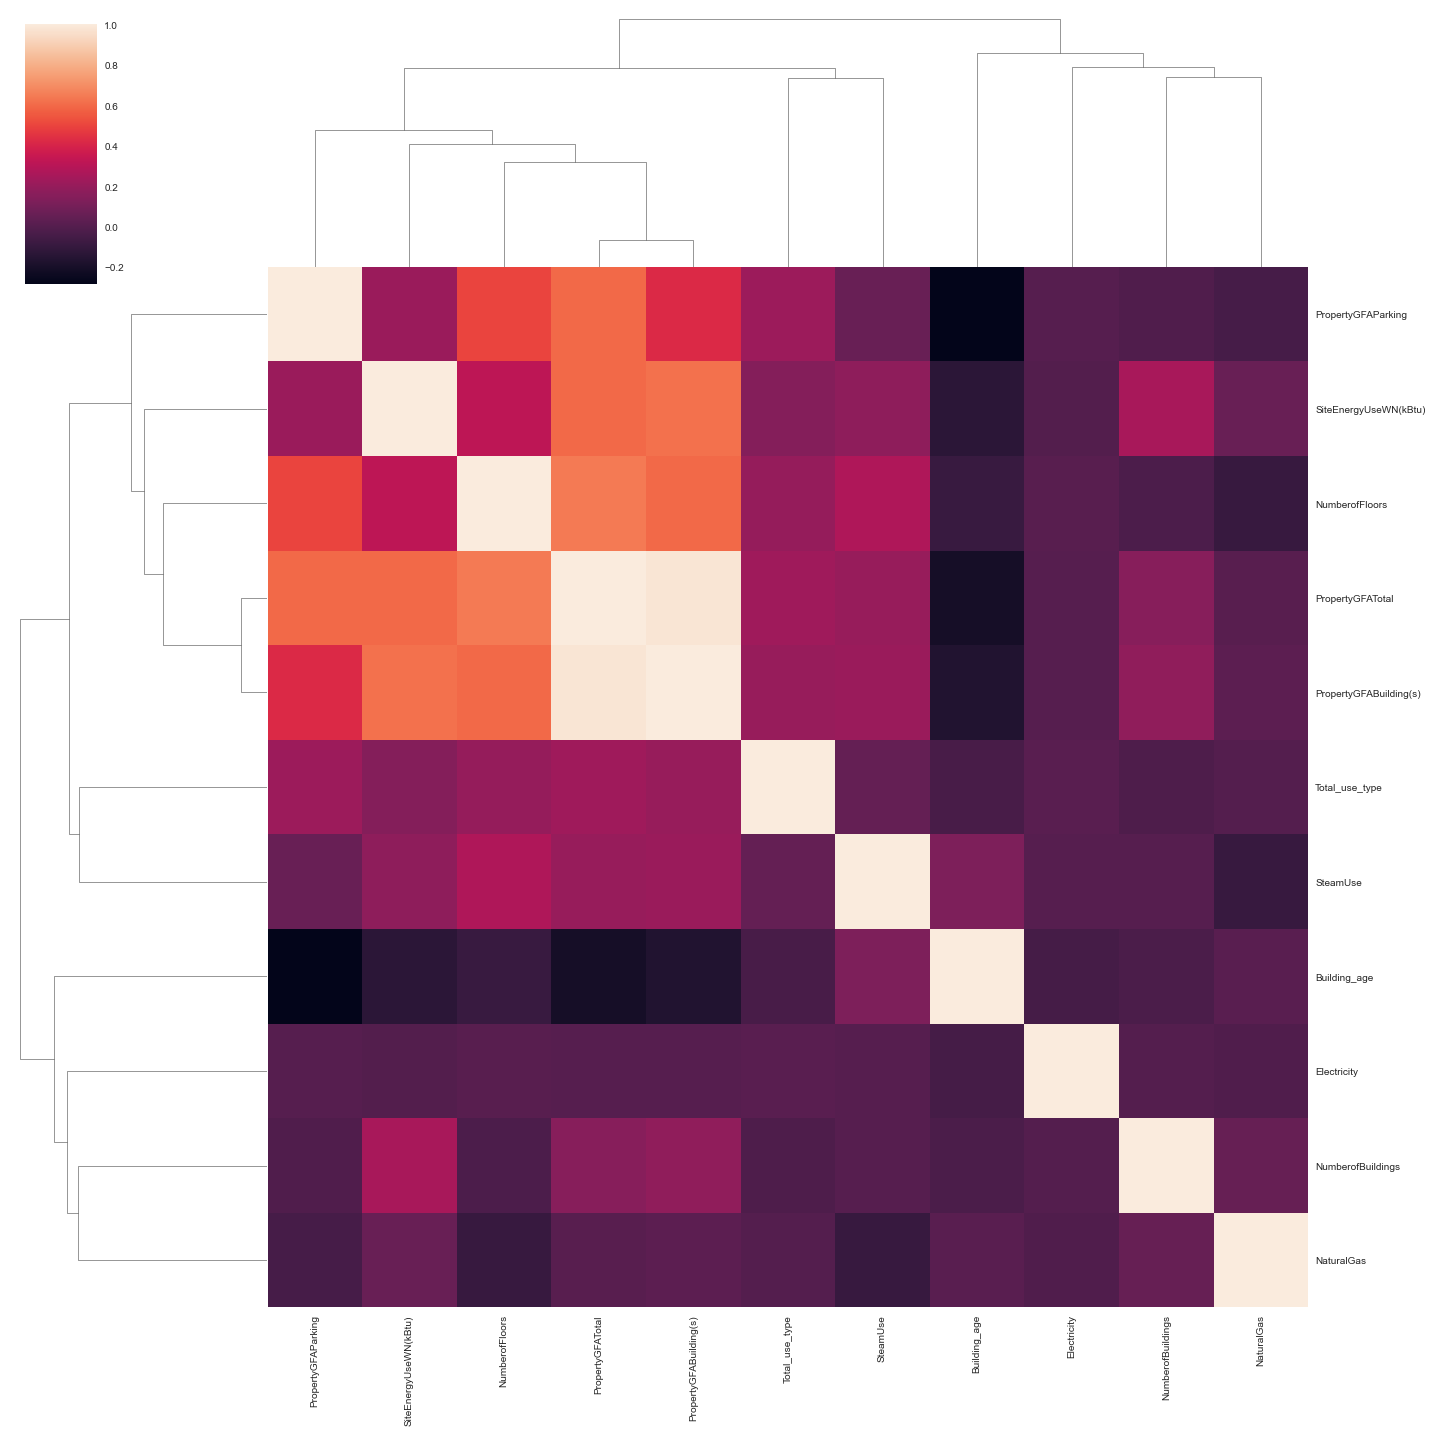

In [218]:
sns.clustermap(site_energy_use.corr(), figsize=(20, 20))

In [219]:
X, y = site_energy_use.drop(['SiteEnergyUseWN(kBtu)'], axis=1), site_energy_use[['SiteEnergyUseWN(kBtu)']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state,
)
print(y_train.shape, y_test.shape)

(1287, 1) (322, 1)


(1287, 1)


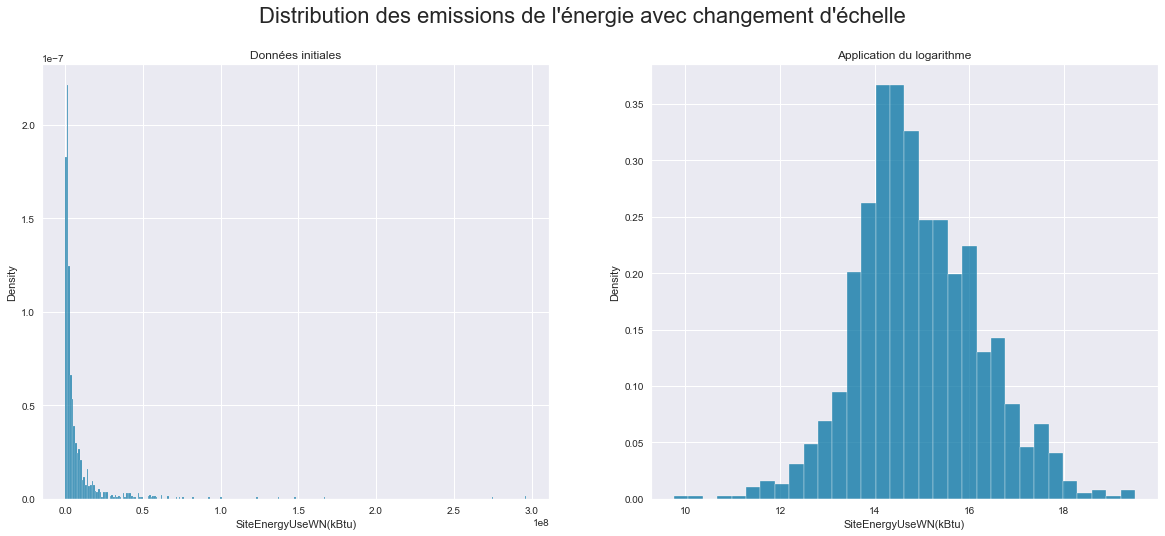

In [220]:

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(y_train)
print(Y_log.shape)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.histplot(data=y_train, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=Y_log, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution des emissions de l'énergie avec changement d'échelle", fontsize=22)
plt.show()

(322, 1)


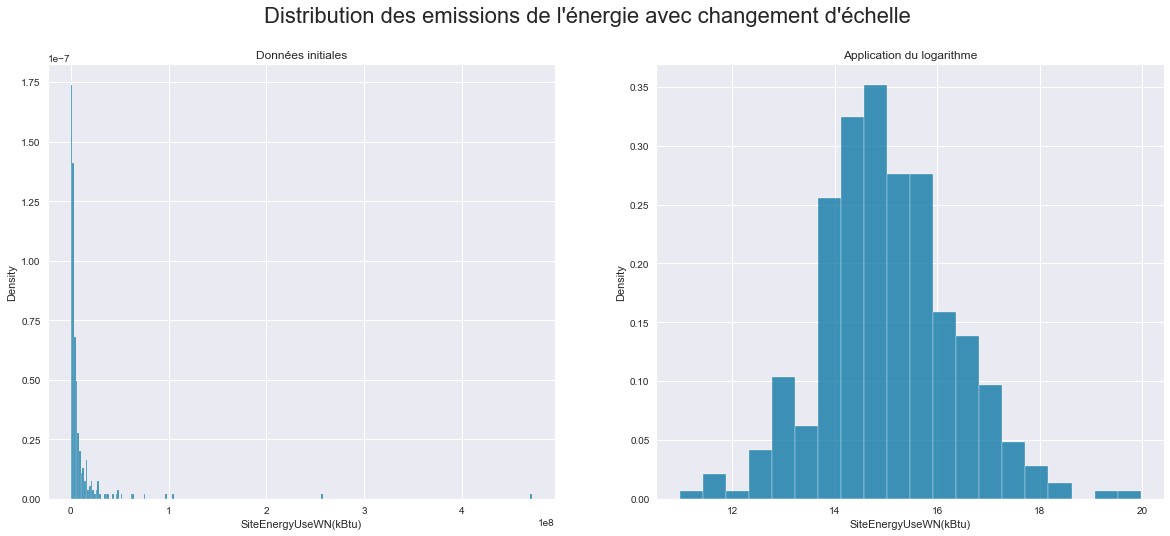

In [221]:
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(y_test)
print(Y_log.shape)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.histplot(data=y_test, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=Y_log, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution des emissions de l'énergie avec changement d'échelle", fontsize=22)
plt.show()

               SiteEnergyUseWN(kBtu)
OSEBuildingID                       
1                          15.824652
2                          15.974742
3                          18.118725
5                          15.753792
8                          16.500395
9                          16.347755
10                         15.617677
11                         15.771071
12                         16.468334
15                         16.627736
16                         17.113941
17                         15.665338
18                         16.930134
19                         16.229566
21                         16.744404
22                         16.137126
23                         17.352168
24                         15.879485
25                         16.133438
26                         17.666149
27                         17.718275
28                         14.354121
29                         15.116570
30                         16.315578
31                         14.085718
3

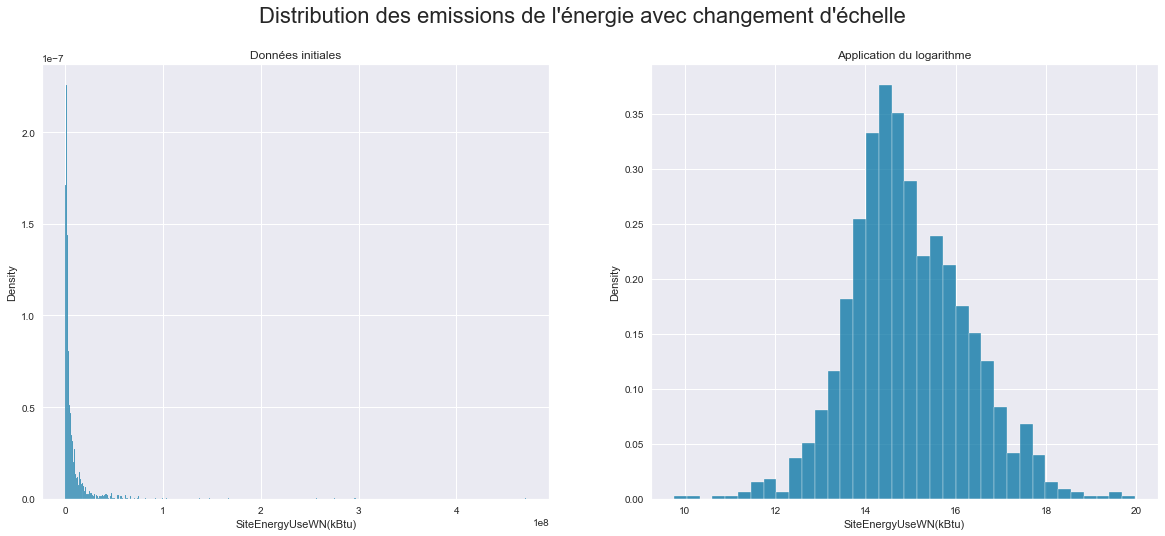

In [222]:
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(y)
print(Y_log)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.histplot(data=y, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=Y_log, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution des emissions de l'énergie avec changement d'échelle", fontsize=22)
plt.show()

In [223]:
# model = sm.OLS(y, X)
# results = model.fit()
# print(results.summary())

In [224]:
# f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8))
# # Use linear model
# regr = Ridge()
# model = Pipeline([
#     ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
#     (regr.__class__.__name__, regr)])
# model.fit(X_train, y_train)
#
# y_pred = model.predict(X_test)
# # Plot results
# ax0.scatter(y_test, y_pred)
# ax0.plot([0, 2000], [0, 2000], "--k")
# ax0.set_ylabel("Target predicted")
# ax0.set_xlabel("True Target")
# ax0.set_title("Ridge regression \n without target transformation")
# ax0.text(
#     100,
#     1750,
#     r"$R^2$=%.2f, MAE=%.2f"
#     % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
# )
# print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred))
# ax0.set_xlim([0, 2000])
# ax0.set_ylim([0, 2000])
# # Transform targets and use same linear model
# regr_trans = TransformedTargetRegressor(
#     regressor=Ridge(), func=np.log, inverse_func=np.exp
# )
# best_model = Pipeline([
#     ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
#     (regr_trans.__class__.__name__, regr_trans)])
# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)
#
# ax1.scatter(y_test, y_pred)
# ax1.plot([0, 2000], [0, 2000], "--k")
# ax1.set_ylabel("Target predicted")
# ax1.set_xlabel("True Target")
# ax1.set_title("Ridge regression \n with target transformation")
# ax1.text(
#     100,
#     1750,
#     r"$R^2$=%.2f, MAE=%.2f"
#     % (r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)),
# )
# ax1.set_xlim([0, 2000])
# ax1.set_ylim([0, 2000])
# # 2202489
# # 1346464
# f.suptitle("Synthetic data", y=0.035)
# # f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
# print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred))

In [225]:
# f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8))
# # Use linear model
# regr = Ridge()
# model = Pipeline([
#     ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
#     (regr.__class__.__name__, regr)])
# model.fit(X_train, y_train)
#
# y_pred = model.predict(X_test)
# # Plot results
# ax0.scatter(y_test, y_pred)
# ax0.plot([0, 2000], [0, 2000], "--k")
# ax0.set_ylabel("Target predicted")
# ax0.set_xlabel("True Target")
# ax0.set_title("Ridge regression \n without target transformation")
# ax0.text(
#     100,
#     1750,
#     r"$R^2$=%.2f, MAE=%.2f"
#     % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
# )
# ax0.set_xlim([0, 2000])
# ax0.set_ylim([0, 2000])
# # Transform targets and use same linear model
# regr_trans = TransformedTargetRegressor(
#     regressor=Ridge(), func=np.log1p, inverse_func=np.expm1
# )
# best_model = Pipeline([
#     ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
#     (regr_trans.__class__.__name__, regr_trans)])
# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)
#
# ax1.scatter(y_test, y_pred)
# ax1.plot([0, 2000], [0, 2000], "--k")
# ax1.set_ylabel("Target predicted")
# ax1.set_xlabel("True Target")
# ax1.set_title("Ridge regression \n with target transformation")
# ax1.text(
#     100,
#     1750,
#     r"$R^2$=%.2f, MAE=%.2f"
#     % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
# )
# ax1.set_xlim([0, 2000])
# ax1.set_ylim([0, 2000])
#
# f.suptitle("Synthetic data", y=0.035)
# print(r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred))

In [226]:
# from sklearn.linear_model import RidgeCV, LassoCV
#
#
# from sklearn.preprocessing import QuantileTransformer, quantile_transform
# f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))
#
# regr = RidgeCV()
# model = Pipeline([
#     ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
#     (RidgeCV().__class__.__name__, RidgeCV())])
# regr.fit(X_train, y_train)
#
# y_pred = regr.predict(X_test)
# print(y_test.shape)
# # y_pred = model.predict(X_test).reshape(-1, 1)
# # y_pred = y_pred.reshape(-1, 1)
# print(y_pred.shape)
# print(mean_absolute_error(y_test, y_pred))
# ax0[0].scatter(y_pred, y_test, s=8)
# ax0[0].plot([0, 7e5], [0, 7e5], "--k")
# ax0[0].set_ylabel("True target")
# ax0[0].set_xlabel("Predicted target")
# ax0[0].text(
#     s="Ridge regression \n without target transformation",
#     x=-5e4,
#     y=8e5,
#     fontsize=12,
#     multialignment="center",
# )
# ax0[0].text(
#     3e4,
#     64e4,
#     r"$R^2$=%.2f, MAE=%.2f"
#     % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
# )
# ax0[0].set_xlim([0, 7e5])
# ax0[0].set_ylim([0, 7e5])
# ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
#
# ax1[0].scatter(y_pred, (y_pred - y_test), s=8)
# ax1[0].set_ylabel("Residual")
# ax1[0].set_xlabel("Predicted target")
# ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
#
#
# model1 = Pipeline([
#     ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
#     (RidgeCV().__class__.__name__, TransformedTargetRegressor(
#         regressor=RidgeCV(),
#         transformer=QuantileTransformer(output_distribution="normal"),
#     ))])
#
# # regr_trans = TransformedTargetRegressor(
# #     regressor=RidgeCV(),
# #     transformer=QuantileTransformer(output_distribution="normal"),
# # )
# regr_trans = TransformedTargetRegressor(
#     regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1
# )
#
# print(regr_trans)
# regr_trans.fit(X_train, y_train)
# # print(regr_trans)
# y_pred = regr_trans.predict(X_test)
#
# print(mean_absolute_error(y_test, y_pred))
# ax0[1].scatter(y_pred, y_test, s=8)
# ax0[1].plot([0, 7e5], [0, 7e5], "--k")
# ax0[1].set_ylabel("True target")
# ax0[1].set_xlabel("Predicted target")
# ax0[1].text(
#     s="Ridge regression \n with target transformation",
#     x=-5e4,
#     y=8e5,
#     fontsize=12,
#     multialignment="center",
# )
# ax0[1].text(
#     3e4,
#     64e4,
#     r"$R^2$=%.2f, MAE=%.2f"
#     % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
# )
# ax0[1].set_xlim([0, 8e5])
# ax0[1].set_ylim([0, 8e5])
# ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
#
# ax1[1].scatter(y_pred, (y_pred - y_test), s=8)
# ax1[1].set_ylabel("Residual")
# ax1[1].set_xlabel("Predicted target")
# ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
#
# f.suptitle("Ames housing data: selling price", y=0.035)
#
# plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


(322, 1)
(322, 1)
4707586.434084724 0.37506360223558743


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


4770479.026932686 0.7602928856945347


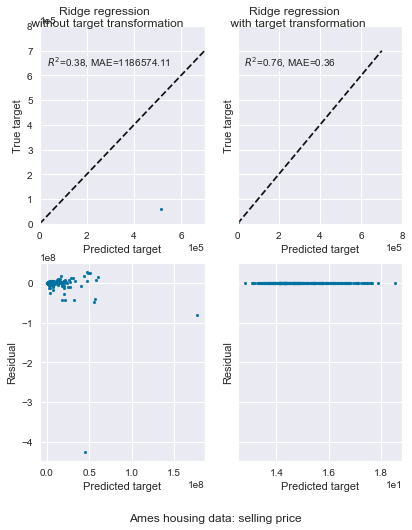

In [227]:

f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

regr = GradientBoostingRegressor()
model = Pipeline([
    ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
    (regr.__class__.__name__, regr)])
model.fit(X_train, y_train)
print(y_test.shape)
y_pred = model.predict(X_test).reshape(-1, 1)
# y_pred = y_pred.reshape(-1, 1)
print(y_pred.shape)
print(mean_absolute_error(y_test, y_pred.reshape(-1, 1)), model.score(X_test, y_test))
ax0[0].scatter(y_pred.reshape(-1, 1), y_test, s=8)
ax0[0].plot([0, 7e5], [0, 7e5], "--k")
ax0[0].set_ylabel("True target")
ax0[0].set_xlabel("Predicted target")
ax0[0].text(
    s="Ridge regression \n without target transformation",
    x=-5e4,
    y=8e5,
    fontsize=12,
    multialignment="center",
)
ax0[0].text(
    3e4,
    64e4,
    r"$R^2$=%.2f, MAE=%.2f"
    % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
)
ax0[0].set_xlim([0, 7e5])
ax0[0].set_ylim([0, 7e5])
ax0[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[0].scatter(y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Residual")
ax1[0].set_xlabel("Predicted target")
ax1[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))


model1 = Pipeline([
    ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
    (regr.__class__.__name__, regr)])

# regr_trans = TransformedTargetRegressor(
#     regressor=model1,
#     transformer=QuantileTransformer(output_distribution="normal"),
# )
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
# Y_log = logtransformer.transform(y_test)
model1.fit(X_train, logtransformer.transform(y_train))
# print(regr_trans)
y_pred = model1.predict(X_test).reshape(-1, 1)

print(mean_absolute_error(y_test, logtransformer.inverse_transform(y_pred)), model1.score(X_test, logtransformer.transform(y_test)))
ax0[1].scatter(y_pred, logtransformer.transform(y_test), s=8)
ax0[1].plot([0, 7e5], [0, 7e5], "--k")
ax0[1].set_ylabel("True target")
ax0[1].set_xlabel("Predicted target")
ax0[1].text(
    s="Ridge regression \n with target transformation",
    x=-5e4,
    y=8e5,
    fontsize=12,
    multialignment="center",
)
ax0[1].text(
    3e4,
    64e4,
    r"$R^2$=%.2f, MAE=%.2f"
    % (r2_score(logtransformer.transform(y_test), y_pred), median_absolute_error(logtransformer.transform(y_test), y_pred)),
)
ax0[1].set_xlim([0, 8e5])
ax0[1].set_ylim([0, 8e5])
ax0[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1[1].scatter(y_pred, (y_pred - logtransformer.transform(y_test)), s=8)
ax1[1].set_ylabel("Residual")
ax1[1].set_xlabel("Predicted target")
ax1[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

f.suptitle("Ames housing data: selling price", y=0.035)

plt.show()


# GRIDSearchCV global avec les différents modèles

In [228]:
models = [
    [GradientBoostingRegressor(random_state=random_state), {'learning_rate': [0.01,0.02,0.03,0.04],
                                                            # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
                                                            # 'n_estimators' : [100,500,1000, 1500],
                                                            'max_depth'    : [4,6,8,10]
                                                            }],
    [XGBRegressor(random_state=random_state), dict( n_jobs=[-1],
                                                    learning_rate=[0.1, 0.5],
                                                    # objective=['reg:squarederror'],
                                                    # max_depth=[5, 10, 15],
                                                    # n_estimators=[100, 500, 1000],
                                                    # subsample=[0.2, 0.8, 1.0],
                                                    gamma=[0.05, 0.5],
                                                    # scale_pos_weight=[0, 1],
                                                    # reg_alpha=[0, 0.5],
                                                    reg_lambda=[1, 0])],
    [Ridge(random_state=random_state), {'alpha': 10 ** np.linspace(10, -2, 100) * 0.5,
                                        'fit_intercept':[True, False],
                                        # 'normalize':[True, False],
                                        'solver':['svd', 'cholesky', 'lsqr', 'sag'],
                                        }],
    [RandomForestRegressor(random_state=random_state), {
        #'max_features' : ['sqrt', 'log2'],
        # "criterion": ["squared_error", "mae"],
        'max_depth': [5, 15, 25, 50],
        'min_samples_split': [2, 5, 10],
        'bootstrap' : [True, False],
        # 'min_samples_leaf': [1,2,5,10]
    }],
    [ElasticNet(random_state=random_state), {"max_iter": [1, 5, 10, 15, 25],
                                             "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                                             "l1_ratio": np.arange(0.0, 1.0, 0.1)}],
    [Lasso(random_state=random_state), {'alpha': (np.logspace(-8, 8, 100)),
                                        'fit_intercept':[True, False],}],
    [SGDRegressor(random_state=random_state),  {
        'alpha': 10.0 ** -np.arange(1, 7),
        'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'learning_rate': ['constant', 'optimal', 'invscaling'],
    }],
    # [SVR(), {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10]}] #,'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')
]


# for model in models:
#     # row = off_tune_model(model[0], 'neg_mean_absolute_error')
#     best_model = global_gridsearch(model, site_energy_use)
#     model_scores(best_model, model[0].__class__.__name__, 'all_features_0')
    # evaluation(best_model, X_train, y_train, X_test, y_test)

In [229]:
# models = [
#     [GradientBoostingRegressor(random_state=random_state), {'regressor__learning_rate': [0.01,0.02,0.03,0.04],
#                                    # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                                    # 'n_estimators' : [100,500,1000, 1500],
#                                    'regressor__max_depth'    : [4,6,8,10]
#                                    }],
#     [XGBRegressor(random_state=random_state), dict( regressor__n_jobs=[-1],
#                                                     regressor__learning_rate=[0.1, 0.5],
#                            # objective=['reg:squarederror'],
#                            # max_depth=[5, 10, 15],
#                            # n_estimators=[100, 500, 1000],
#                            # subsample=[0.2, 0.8, 1.0],
#                                                     regressor__gamma=[0.05, 0.5],
#                            # scale_pos_weight=[0, 1],
#                            # reg_alpha=[0, 0.5],
#                                                     regressor__reg_lambda=[1, 0])],
#     [Ridge(random_state=random_state), {'regressor__alpha': 10 ** np.linspace(10, -2, 100) * 0.5,
#                'regressor__fit_intercept':[True, False],
#                # 'normalize':[True, False],
#                'regressor__solver':['svd', 'cholesky', 'lsqr', 'sag'],
#                }],
#     [LinearRegression(),  {"regressor__fit_intercept": [True, False],
#      }],
#     [RandomForestRegressor(random_state=random_state), {
#         #'max_features' : ['sqrt', 'log2'],
#         # "criterion": ["squared_error", "mae"],
#         'regressor__max_depth': [5, 15, 25, 50],
#         'regressor__min_samples_split': [2, 5, 10],
#         'regressor__bootstrap' : [True, False],
#         # 'min_samples_leaf': [1,2,5,10]
#     }],
#     [ElasticNet(random_state=random_state), {"regressor__max_iter": [1, 5, 10, 15, 25],
#                     "regressor__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                     "regressor__l1_ratio": np.arange(0.0, 1.0, 0.1)}],
#     [Lasso(random_state=random_state), {'regressor__alpha': (np.logspace(-8, 8, 100)),
#                'regressor__fit_intercept':[True, False],}],
#     # [SGDRegressor(random_state=random_state),  {
#     #     'regressor__alpha': 10.0 ** -np.arange(1, 7),
#     #     'regressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     #     'regressor__penalty': ['l2', 'l1', 'elasticnet'],
#     #     'regressor__learning_rate': ['constant', 'optimal', 'invscaling'],
#     # }],
#     # [SVR(), {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10]}] #,'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')
# ]
#
#
# for model in models:
#     # row = off_tune_model(model[0], 'neg_mean_absolute_error')
#     best_model = global_gridsearch(model, site_energy_use)
#     model_scores(best_model, model[0].__class__.__name__, 'log_teston_reg')
#     # evaluation(best_model, X_train, y_train, X_test, y_test)

# Visualisation des meilleurs params

In [230]:
d = visualise_best_model('final/')
d
-1925568.199
-3224766.157

model           MAE            R2  \
0                   ElasticNet -5.367946e+06  2.952311e-02   
1                   ElasticNet -5.367946e+06  2.952311e-02   
2                   ElasticNet -6.198796e+06 -1.690600e-01   
3                   ElasticNet -3.428020e+06  5.466510e-01   
4                   ElasticNet -3.469670e+06  5.525375e-01   
5                   ElasticNet -4.248075e+06  6.474652e-01   
6                   ElasticNet -4.247184e+06  6.475050e-01   
7                   ElasticNet -5.947195e+06  5.868001e-01   
8                   ElasticNet -5.953476e+06  5.763171e-01   
9    GradientBoostingRegressor -3.145853e+06  7.405145e-01   
10   GradientBoostingRegressor -3.145853e+06  7.405145e-01   
11   GradientBoostingRegressor -3.652060e+06  6.269994e-01   
12   GradientBoostingRegressor -2.878468e+06  6.214752e-01   
13   GradientBoostingRegressor -2.889071e+06  6.183010e-01   
14   GradientBoostingRegressor -3.573446e+06  6.692802e-01   
15   GradientBoostingRegressor -3.571065e+06  6.693408e-01   
16   GradientBoostingRegressor -3.579944e+06  7.025529e-01   
17   GradientBoostingRegressor -3.573056e+06  7.027777e-01   
18                       Lasso -5.375477e+06  1.958235e-01   
19                       Lasso -5.375477e+06  1.958235e-01   
20                       Lasso -6.075559e+06 -6.565986e-03   
21                       Lasso -3.440257e+06  5.416792e-01   
22                       Lasso -3.469712e+06  5.488396e-01   
23                       Lasso -4.042883e+06  6.591738e-01   
24                       Lasso -4.009960e+06  6.589321e-01   
25                       Lasso -5.953043e+06  5.844398e-01   
26                       Lasso -5.908919e+06  5.707321e-01   
27            LinearRegression -5.852017e+06 -1.080103e+00   
28            LinearRegression -5.852017e+06 -1.080103e+00   
29            LinearRegression -6.375872e+06 -1.720778e+00   
30            LinearRegression -3.454679e+06  5.380535e-01   
31            LinearRegression -3.469712e+06  5.488396e-01   
32            LinearRegression -7.278882e+17 -1.139701e+24   
33            LinearRegression -4.292216e+06  6.452124e-01   
34            LinearRegression -5.960490e+06  5.667062e-01   
35            LinearRegression -5.960490e+06  5.667062e-01   
36       RandomForestRegressor -3.188465e+06  7.427796e-01   
37       RandomForestRegressor -3.188465e+06  7.427796e-01   
38       RandomForestRegressor -3.992562e+06  4.361175e-01   
39       RandomForestRegressor -2.819822e+06  6.406504e-01   
40       RandomForestRegressor -2.855082e+06  6.351057e-01   
41       RandomForestRegressor -3.520091e+06  6.937048e-01   
42       RandomForestRegressor -3.519586e+06  6.939356e-01   
43       RandomForestRegressor -3.444051e+06  7.525387e-01   
44       RandomForestRegressor -3.438019e+06  7.527086e-01   
45                       Ridge -5.376572e+06  3.914511e-03   
46                       Ridge -5.376572e+06  3.914511e-03   
47                       Ridge -6.193110e+06 -1.585040e-01   
48                       Ridge -3.440942e+06  5.413092e-01   
49                       Ridge -3.463000e+06  5.502702e-01   
50                       Ridge -4.267425e+06  6.470367e-01   
51                       Ridge -4.266341e+06  6.468040e-01   
52                       Ridge -5.954866e+06  5.884932e-01   
53                       Ridge -5.907072e+06  5.781202e-01   
54                SGDRegressor -4.528943e+06  5.731716e-01   
55                SGDRegressor -6.760542e+06 -3.053323e-02   
56                SGDRegressor -2.119824e+08 -3.608035e+02   
57                SGDRegressor -1.559742e+08 -1.608723e+02   
58                XGBRegressor -3.078314e+06  7.516536e-01   
59                XGBRegressor -3.078314e+06  7.516536e-01   
60                XGBRegressor -3.739998e+06  6.020789e-01   
61                XGBRegressor -2.861828e+06  6.594178e-01   
62                XGBRegressor -2.874119e+06  6.456655e-01   
63                XGBRegressor -3.577744e+06  6.728034e-0

# Optimisation du meilleur modèle

In [231]:
best_param = {'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'n_jobs': 16, 'objective': 'reg:squarederror', 'reg_alpha': 0.5, 'reg_lambda': 0, 'scale_pos_weight': 0, 'subsample': 0.8}

preprocessor = make_pipeline(SelectKBest(f_classif, k=8))

preprocessor1 = make_pipeline(PolynomialFeatures(3, include_bias=False)#, SelectKBest(f_classif, k=8)
 )

In [232]:
best_model = Pipeline([
    ('preprocessor', transformers_encoders(site_energy_use, 'SiteEnergyUseWN(kBtu)', 0, 1)),
    # ('preprocessor1', preprocessor1),
    (XGBRegressor().__class__.__name__, XGBRegressor(**best_param, random_state=random_state))])
best_model.fit(X_train, y_train)
# model_metric(best_model, X_train, y_train, X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood'], dtype='object')),
                                                 ('num', RobustScaler(),
                                                  Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'Building_age',
       'Tot...
                              gamma=0.05, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=5, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=16, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0.5,
                              reg_lambda=0, ...))])

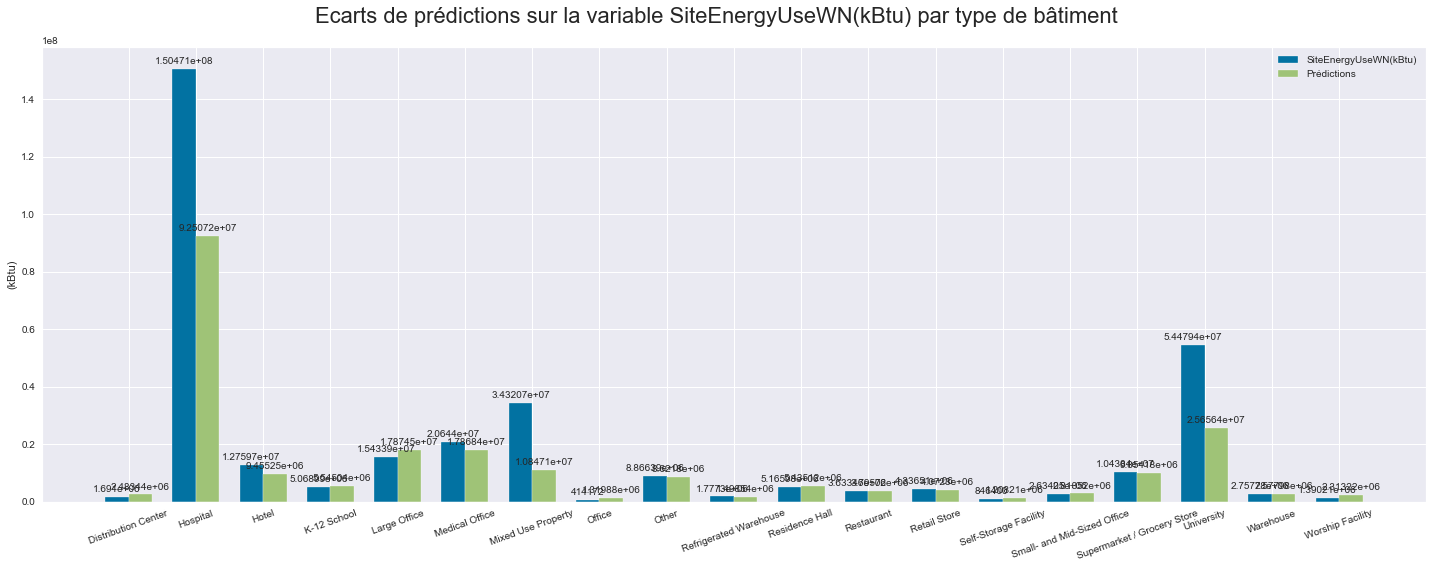

In [233]:
final_SEU_test = pd.concat([X_test,y_test],axis=1)
final_SEU_test['SEU_pred'] = best_model.predict(X_test)
compare_final_SEU_test = final_SEU_test = final_SEU_test.groupby(by='PrimaryPropertyType').mean()
x = np.arange(len(compare_final_SEU_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8))

scores1 = ax.bar(x - width/2, compare_final_SEU_test['SiteEnergyUseWN(kBtu)'], width, label='SiteEnergyUseWN(kBtu)')
# scores1 = ax.bar(x  , widthlabel='SiteEnergyUseWN(kBtu)')
scores2 = ax.bar(x + width/2, compare_final_SEU_test['SEU_pred'], width, label='Prédictions')
# scores2 = ax.bar(x , compare_final_SEU_test['SEU_pred'], width, label='Prédictions')
ax.set_ylabel('(kBtu)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_SEU_test.index, rotation=20)
ax.legend()
ax.bar_label(scores1, padding=3)
ax.bar_label(scores2, padding=3)

plt.suptitle("Ecarts de prédictions sur la variable SiteEnergyUseWN(kBtu) par type de bâtiment", fontsize=22)
fig.tight_layout()

plt.show()

# Plot du learning curve

In [ ]:
dist_param = {'regressor__learning_rate': [0.03],
              'regressor__subsample'    :   [0.9],
              'regressor__n_estimators' : [500],
              'regressor__max_depth'    : [4],
              # 'regressor__alpha'    : np.arange(0.1, 1.0, 0.1),
              'regressor__max_features'    : [1.0, 'sqrt', 'log2'],
              # 'regressor__max_features'    :  np.arange(2,10),
              'regressor__min_samples_split'    :  np.arange(2,10),
              'regressor__min_samples_leaf'    :  [ 1, 2, 3, 5, 7, 10],
              # 'regressor__min_weight_fraction_leaf'    :  np.arange(0.1, 0.6, 0.1),
              # "regressor__criterion": ["squared_error", "friedman_mse"],
              # "regressor__loss": ["squared_error", 'huber'],
              "regressor__tol": [1e-3, 1e-4, 1e-5],
              "regressor__n_iter_no_change": [ 1, 2, 3],
              "regressor__max_leaf_nodes": [2, 10, 20],
              # "regressor__loss": ["squared_error", "absolute_error", 'huber', 'quantile'],
              }

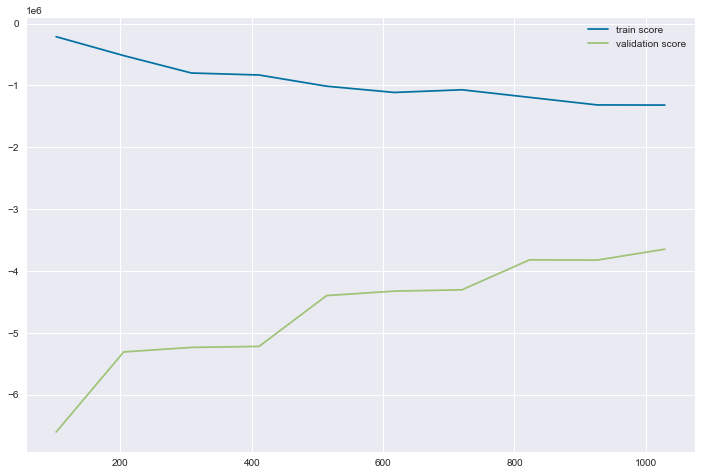

In [234]:
plot_learning_curve(XGBRegressor(**best_param, random_state=random_state), site_energy_use, X_train, y_train, 'neg_mean_absolute_error')

In [235]:
# site_energy_use.drop(site_energy_use[site_energy_use['SiteEnergyUseWN(kBtu)'] >= 1.000000e+08].index, axis=0, inplace=True)
# site_energy_use[site_energy_use['SiteEnergyUseWN(kBtu)'] >= 1.000000e+08]
# site_energy_use[site_energy_use['SiteEnergyUseWN(kBtu)'] >= 257764208.0]

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# X, y = site_energy_use.drop([target], axis=1), site_energy_use[target]
#
# print(pd.qcut(y, 10, labels=range(0, 10)).value_counts())
#
# for train_index, test_index in  StratifiedKFold(n_splits=5).split(X, pd.qcut(y, 10, labels=range(0, 10))):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# print(y_train.shape, y_test.shape)

# Evaluation des features importances avec Shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


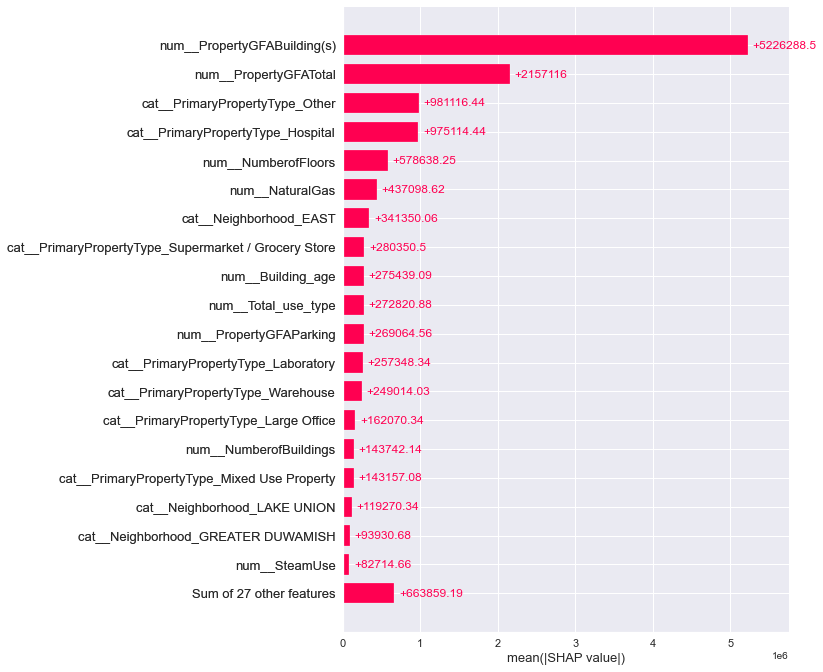

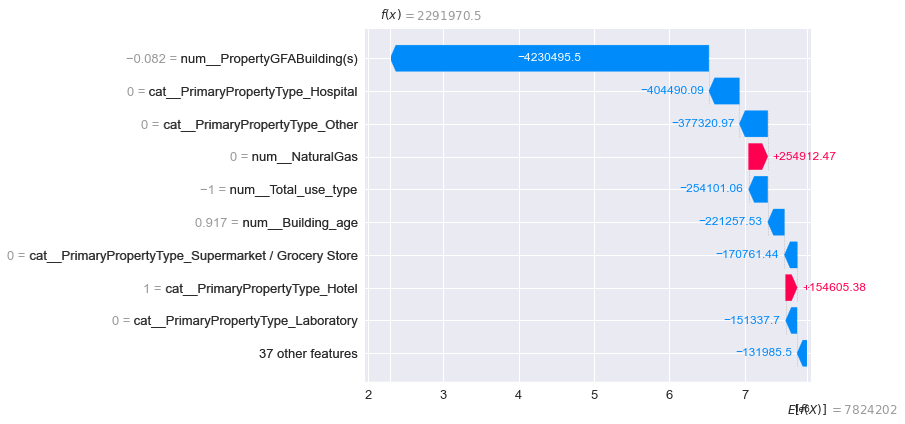

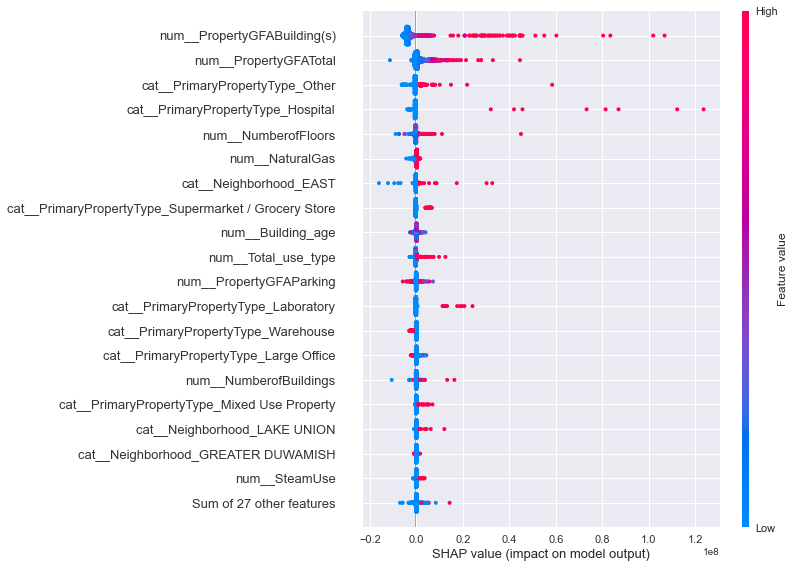

In [236]:
features_importance(best_model, XGBRegressor(random_state=random_state))

# influence de la feature energy_star_score

In [237]:
#Ajout de la variable à nos variables X
X_star, y_star = X.copy(), y.copy()
X_star['energystar_score'] = energystar_score

#Filtrage des données ayant un Energy Star Score renseigné
X_star = X_star[X_star['energystar_score'].isnull()==False]
y_star = y_star[y_star.index.isin(list(X_star.index))]
print(X_star.shape, y_star.shape)

(1063, 14) (1063, 1)


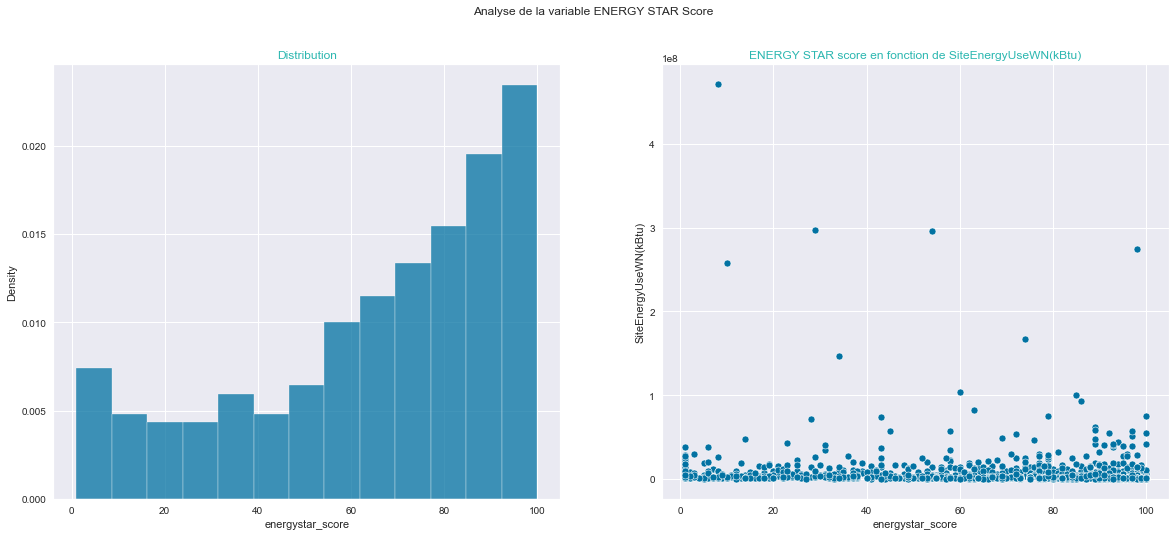

In [238]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(data=X_star, x='energystar_score', stat="density", ax=axes[0])
axes[0].set_title("Distribution", color='#2cb7b0')
sns.scatterplot(data=pd.concat([X_star,y_star], axis=1), y='SiteEnergyUseWN(kBtu)', x='energystar_score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de SiteEnergyUseWN(kBtu)", color='#2cb7b0')
plt.suptitle("Analyse de la variable ENERGY STAR Score")
plt.show()

In [239]:
X_train_star, X_test_star, y_train_star, y_test_star = train_test_split(X_star, y_star, test_size=0.2, random_state=random_state)
print(y_train_star.shape, y_test_star.shape)

(850, 1) (213, 1)


In [240]:
star_model = Pipeline([
    ('preprocessor', transformers_encoders(X_star, 'SiteEnergyUseWN(kBtu)', 0, 1, energy_star_score=True)),
    (XGBRegressor().__class__.__name__, XGBRegressor(**best_param))])
star_model.fit(X_train_star, y_train_star)
model_metric(star_model, X_train_star, y_train_star, X_test_star, y_test_star)

MAE: 3387169.05
R2: 0.45309795902460615
MSE: 204015589856645.9
RMSE: 14283402.6008037


ValueError: Unable to coerce to Series, length must be 1: given 213